In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

data = np.loadtxt('sqisland.csv',delimiter=',',skiprows=1,usecols=range(2,9))
print(data[0,:])


[1.         0.         0.2        0.8        0.52203709 0.15944427
 0.31851864]


##Question 1
###For each of the 7 genes, produce a contour plot visualising how its relative frequency varies across the whole island.

In [31]:
x = np.linspace(0, 9, 10)
y = np.linspace(0, 9, 10)
X, Y = np.meshgrid(x, y)


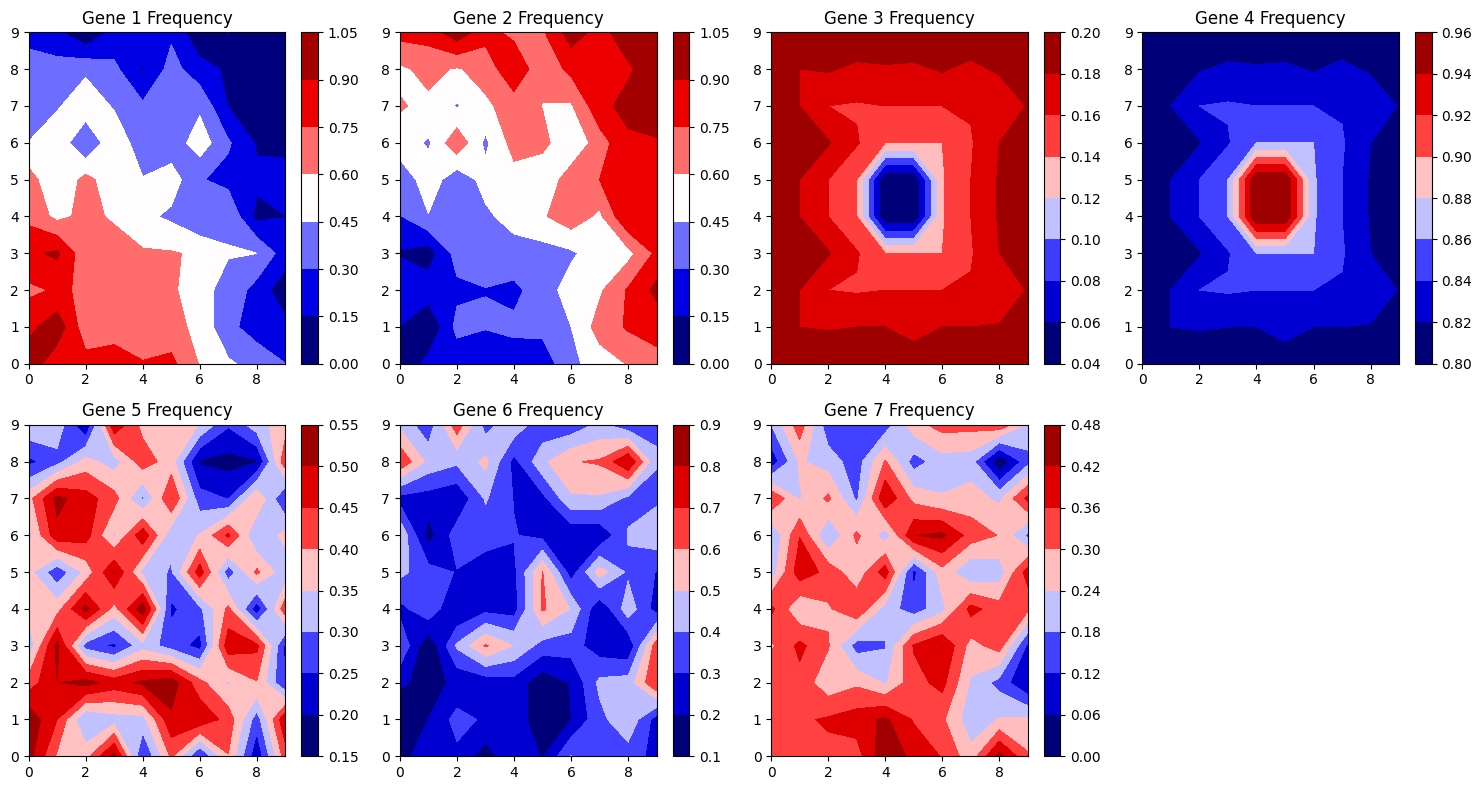

In [35]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for i in range(7):
    Z = np.reshape(data[:, i], (10, 10), order='C')
    ax = axes[i // 4, i % 4]

    contour = ax.contourf(X, Y, Z, cmap="seismic")
    fig.colorbar(contour, ax=ax)

    ax.set_title(f"Gene {i+1} Frequency", fontsize=12)

fig.delaxes(axes[1, 3])

plt.tight_layout()
plt.show()

##Question 2
###Study the contour plots to form a hypothesis about the most common alleles for Locus 1 and Locus 2 in: (a) the hunter-gatherers’ population; (b) in the farmers’ population.

####The hunter-gatherers were the first inhabitants of Square Island, meaning their genes were initially spread across the entire island before later migrations. From the contour maps, Gene 2 at Locus 1 appears to have been dominant before the arrival of farmers, as Gene 1 is concentrated in the South-West, where farmers first settled. Similarly, Gene 4 at Locus 2 was likely the most common among hunter-gatherers, as the presence of Gene 3 increases near the coasts, suggesting it was introduced later by seafarers. The farmers, who migrated from the South-West, likely brought Gene 1 at Locus 1, which spread outward as they expanded their settlements. However, Locus 2 does not show a clear pattern linked to the farmers’ migration, indicating that seafarers had a stronger influence on Gene 3 and Gene 4. Since no strong correlation is visible between the farmers' settlement pattern and Locus 2, it remains uncertain whether they significantly influenced the allele distribution at that locus.

##Question 3
###Describe any significant characteristics of the genetic makeup of the population of seafarers.

The seafarers were the last migration wave to arrive on Square Island, meaning their genetic influence would likely be strongest in coastal areas where they first settled. From the contour maps, a significant characteristic of their genetic makeup is the increase in Gene 3 at Locus 2 near the shores, while Gene 4 is more frequent inland. This suggests that seafarers introduced Gene 3, which gradually spread inward from the coastline. Additionally, if any genes in Locus 3 (Genes 5, 6, or 7) show a pattern of high concentration along the coasts, it could indicate another genetic marker specific to the seafarers.

Another potential characteristic of the seafarers' genetic influence is genetic mixing with the existing populations. Since they arrived later, their genetic impact would likely be less widespread compared to farmers or hunter-gatherers but more concentrated in coastal regions. If the contour plots show a gradual blending of seafarer genes into the island's interior, it would suggest intermixing with farmers and hunter-gatherers over time. This could mean that while seafarers introduced new genetic variants, their alleles may not have entirely replaced those of earlier populations but rather contributed to a more diverse genetic landscape in coastal areas.

##Question 4
###Calculate and display the variance of each of the 7 gene attributes.

In [41]:
print("Variance of Each Gene:", np.var(data, axis=0, ddof=1))


Variance of Each Gene: [0.06119438 0.06119438 0.00109462 0.00109462 0.00961021 0.02098122
 0.0091665 ]


##Question 5
###Calculate the Pearson correlation between (a) Gene 1 and Gene 4; (b) Gene 1 and Gene 5. State if the null hypothesis of non-correlation can be rejected for either pair at the 95% significance level. Do these results agree with your hypothesis about the genetic makeup of the farmers from the second wave?

In [37]:
#Correlation between Gene 1 and Gene 4
correlation_1_4, p_value_1_4 = pearsonr(data[:, 0], data[:, 3])
print("Correlation between Gene 1 and Gene 4:", correlation_1_4)

Correlation between Gene 1 and Gene 4: 0.07526456660171583


In [38]:
#Correlation between Gene 1 and Gene 5
correlation_1_5, p_value_1_5 = pearsonr(data[:, 0], data[:, 4])
print("Correlation between Gene 1 and Gene 5:", correlation_1_5)

Correlation between Gene 1 and Gene 5: 0.36012032407985833


At the 95% significance level, the null hypothesis of non-correlation is not rejected for Gene 1 and Gene 4 (p = 0.457), meaning there is no significant relationship between these genes. However, for Gene 1 and Gene 5, the null hypothesis is rejected (p = 0.000), indicating a statistically significant positive correlation. These results align with the hypothesis that farmers from the second wave introduced Gene 1, and their genetic influence is linked to Gene 5, while Gene 4 remained separate, likely associated with the original hunter-gatherer population.

##Question 6
###Apply principal component analysis (PCA) to the data consisting of the relative frequencies of Genes 1–7. Transform the data using all 7 principal components and calculate and display the variance for each of them.

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca_transformed = pca.fit_transform(data)

variance_explained = pca.explained_variance_

print("Variance explained by each principal component:")
for i, var in enumerate(variance_explained):
    print(f"PC{i+1}: {var:.6f}")


Variance explained by each principal component:
PC1: 0.132246
PC2: 0.021681
PC3: 0.008268
PC4: 0.002141
PC5: 0.000000
PC6: 0.000000
PC7: 0.000000


##Question 7
###Compare the sums of variances of all 7 attributes before and after transforming the data via PCA. Comment briefly whether the result can be expected or not and why.

In [54]:
original_variance_sum = np.sum(np.var(data, axis=0, ddof=1))
pca_variance_sum = np.sum(pca.explained_variance_)

print(f"Total variance before PCA: {original_variance_sum:.6f}")
print(f"Total variance after PCA: {pca_variance_sum:.6f}")

np.isclose(original_variance_sum, pca_variance_sum, atol=1e-6)

Total variance before PCA: 0.164336
Total variance after PCA: 0.164336


True

##Question 8
###Plot the first two PCA components as contour plots visualising the relative frequencies of each component across the island. Compare the result to the contour plots for Gene 1 and Gene 3 (data before PCA). Which of the two pairs of plots do you find more helpful for the task of reconstructing the waves of migration? Do you expect the same result for a realistic data set with hundreds of genes and why?


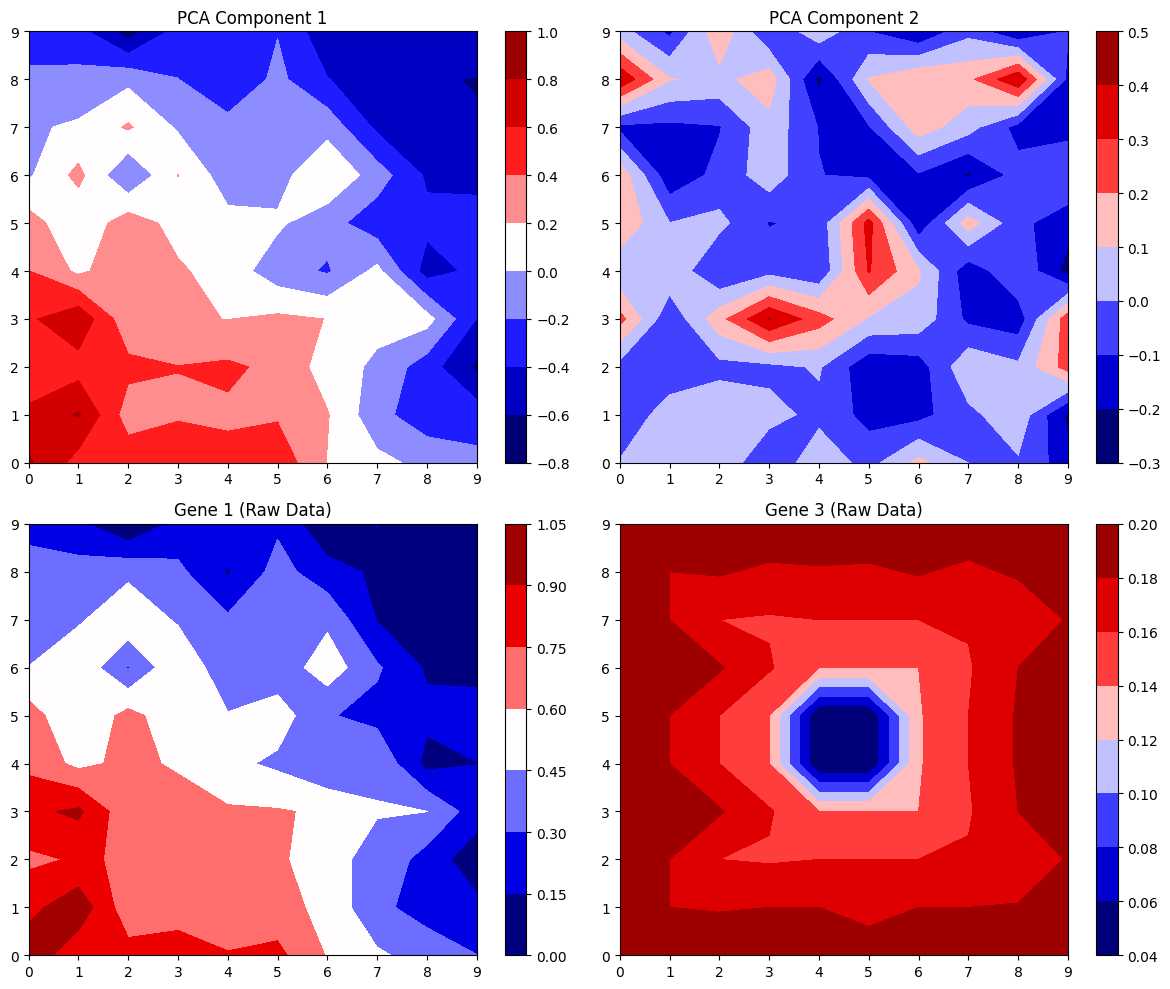

In [60]:
pc1 = np.reshape(pca_transformed[:, 0], (10, 10), order='C')
pc2 = np.reshape(pca_transformed[:, 1], (10, 10), order='C')

gene1 = np.reshape(data[:, 0], (10, 10), order='C')
gene3 = np.reshape(data[:, 2], (10, 10), order='C')

x = np.linspace(0, 9, 10)
y = np.linspace(0, 9, 10)
X, Y = np.meshgrid(x, y)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

ax = axes[0, 0]
contour = ax.contourf(X, Y, pc1, cmap="seismic")
plt.colorbar(contour, ax=ax)
ax.set_title("PCA Component 1")

ax = axes[0, 1]
contour = ax.contourf(X, Y, pc2, cmap="seismic")
plt.colorbar(contour, ax=ax)
ax.set_title("PCA Component 2")

ax = axes[1, 0]
contour = ax.contourf(X, Y, gene1, cmap="seismic")
plt.colorbar(contour, ax=ax)
ax.set_title("Gene 1 (Raw Data)")

ax = axes[1, 1]
contour = ax.contourf(X, Y, gene3, cmap="seismic")
plt.colorbar(contour, ax=ax)
ax.set_title("Gene 3 (Raw Data)")

plt.tight_layout()
plt.show()